# Plotting vread performace testing data


Code that takes data input to plot graph with 'error' bars of variance of time measurements for vector reads of differing sizes.

Part one takes data from two files and plots them against each other - for comparisons of lock/no lock

This assumes a data format of readsize \t gapsize \t numreads \t time

For all of my data I was only varying the number of reads so the 'dataindex' variable is always 2, but if you were to vary another variable using my code to perform the tests you can change this index according to the formatting which is explained below.

In terms of actually plotting the data my method has beeen this:
 - read in the data to numpy arrays
 - got all the unique values for number of reads from each data set and checked they are the same for both data sets
 - created a new array that represents edges of 'bins', with first element 0 then each number of reads plus 10
 - used the scipy.stats.binned_statistic to easily get the average/min/max of each data set in each 'bin' (i.e. at each value of number of reads) instead of doing much more manual processing of the data
 - used these values to create arrays of data points and 'errors' to plot the average and range of timings for each number of reads per data set

I do not know if this was the best way to process the data, but it was easiest for me as I was familiar with the methods/scipy.stats library from previous work

You can then cretae a graph from the two data sets read in at the start, or skip forward to read in more data to plot graphs with more data sets if wanted.

The only things you should need to edit are the file names/plot labels if you are after plots similar to those produced by me - filenames in cell 2 and plot labels in plotting cells. But feel free to use this as a basis if you want to do anything more intricte/build upon this.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import stats

In [29]:
# User input

# What will be plotted on the x-axis? Read size - 0, gap size - 1, number reads - 2
dataindex = 2

#File names
datafile1 = 'timings-10concurr-plain-nolock-readsize10000-readgap100000-3.txt'
datafile2 = 'timings-15concurr-plain-nolock-readsize10000-readgap100000-3.txt'
datafile3 = 'timings-20concurr-plain-nolock-readsize10000-readgap100000-3.txt'
datafile4 = 'startend-10concurr-plain-nolock.txt'

In [30]:
# take my input and format for plotting

data1=[]
time1=[]
with open(datafile1) as inputfile:
    data_reader = csv.reader(inputfile, delimiter='\t')
    for data in data_reader:
        data1.append(data[dataindex])
        time1.append(data[3])
        
data2=[]
time2=[]
with open(datafile2) as inputfile:
    data_reader = csv.reader(inputfile, delimiter='\t')
    for data in data_reader:
        data2.append(data[dataindex])
        time2.append(data[3])

# convert to floats in numpy arrays
data1=np.array(data1).astype(np.float)
time1=np.array(time1).astype(np.float)
data2=np.array(data2).astype(np.float)
time2=np.array(time2).astype(np.float)

In [31]:
# Getting x values from data we can create bins from
check1 = np.unique(data1)
check2 = np.unique(data2)

#Checking these values are the same for each data set - should always be
for i in range(check1.size):
    if(check1[i] != check2[i]):
        print("error")
        
x = check1

# Sorting out binning for data
bins=[0]
for el in check1:
    bins.append(el+10)


In [32]:
y1 = stats.binned_statistic(data1, time1, 'mean', bins).statistic
y1errplus = stats.binned_statistic(data1, time1, 'max', bins).statistic - y1
y1errminus = y1 - stats.binned_statistic(data1, time1, 'min', bins).statistic

y2 = stats.binned_statistic(data2, time2, 'mean', bins).statistic
y2errplus = stats.binned_statistic(data2, time2, 'max', bins).statistic - y2
y2errminus = y2 - stats.binned_statistic(data2, time2, 'min', bins).statistic

In [ ]:
# Do the plots
plt.errorbar(x, y1, yerr=[y1errplus, y1errminus], label = "no lock 20", capsize=3.0, capthick=1.5, marker='')
plt.errorbar(x, y2, yerr=[y2errplus, y2errminus], label = "no lock 10", capsize=3.0, capthick=1.5, marker='')
plt.legend()
plt.title("vreads with read size 10000, gap 100000 and varying number of reads")
plt.xlabel("number of reads")
plt.ylabel("time (s)")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

# Plotting the concurrent data

You can also use this to plot more than two data sets on the same diagram.

Below I have simply copy and pasted the data processing of the initial data sets calling them data3/data4 - this coud very easily be expanded to more data sets if you wanted to lot them for comparisons. You can go back and re-run the processing of data1/data2 to be the data file you want in the below plot.

In [33]:
data3=[]
time3=[]
with open(datafile3) as inputfile:
    data_reader = csv.reader(inputfile, delimiter='\t')
    for data in data_reader:
        data3.append(data[dataindex])
        time3.append(data[3])
        
data3=np.array(data3).astype(np.float)
time3=np.array(time3).astype(np.float)

y3 = stats.binned_statistic(data3, time3, 'mean', bins).statistic
y3errplus = stats.binned_statistic(data3, time3, 'max', bins).statistic - y3
y3errminus = y3 - stats.binned_statistic(data3, time3, 'min', bins).statistic

In [ ]:
data4=[]
time4=[]
with open(datafile4) as inputfile:
    data_reader = csv.reader(inputfile, delimiter='\t')
    for data in data_reader:
        data4.append(data[dataindex])
        time4.append(data[3])
        
data4=np.array(data4).astype(np.float)
time4=np.array(time4).astype(np.float)

y4 = stats.binned_statistic(data4, time4, 'mean', bins).statistic
y4errplus = stats.binned_statistic(data4, time4, 'max', bins).statistic - y4
y4errminus = y4 - stats.binned_statistic(data4, time4, 'min', bins).statistic

In [ ]:
# Do the plots
plt.errorbar(x, y1, yerr=[y1errplus, y1errminus], label = "no lock 10 concurrent", capsize=3.0, capthick=1.5, marker='')
plt.errorbar(x, y2, yerr=[y2errplus, y2errminus], label = "no lock 15 concurrent", capsize=3.0, capthick=1.5, marker='')
plt.errorbar(x, y3, yerr=[y3errplus, y3errminus], label = "no lock 20 concurrent", capsize=3.0, capthick=1.5, marker='')
#plt.errorbar(x, y4, yerr=[y4errplus, y4errminus], label = "lock 10", capsize=3.0, capthick=1.5, marker='')
plt.legend()
plt.title("vreads with read size 10000, gap 100000 and varying number of reads")
plt.xlabel("number of reads")
plt.ylabel("time (s)")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

Now for plotting aggregate data rate - this is more manual as it was only done for a couple of data sets when running concurrent access. If more was done in the future I'm sure it could be automated

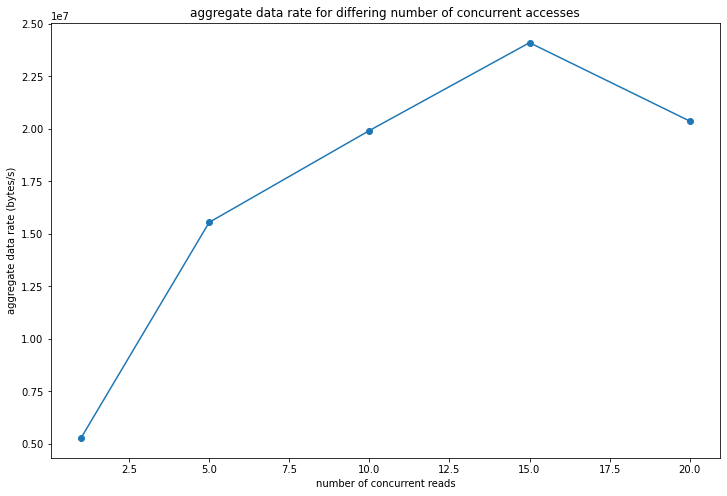

In [7]:
totnumread = 25500 # total number of reads by one set of tests varying number of read
dataread = totnumread*10000 # each read was set to be 10000 bytes
conc5totdata = dataread*5
conc10totdata = dataread*10
conc15totdata = dataread*15
conc20totdata = dataread*20

# these values have been taken from the end-start times of each concurrency run
noconctimes = [36, 52, 57]
conc5times = [83, 81, 82]
conc10times = [119, 133, 132]
conc15times = [148, 164, 164]
conc20times = [234, 268, 249]

x = [1, 5, 10, 15, 20]
ynolock = [3*dataread/np.sum(noconctimes), 3*conc5totdata/np.sum(conc5times), 3*conc10totdata/np.sum(conc10times), 3*conc15totdata/np.sum(conc15times), 3*conc20totdata/np.sum(conc20times)]

plt.plot(x, ynolock, marker='o')
plt.title("aggregate data rate for differing number of concurrent accesses")
plt.xlabel("number of concurrent reads")
plt.ylabel("aggregate data rate (bytes/s)")
#plt.ylim([10000000,18000000])
#plt.xlim([0, 21])
plt.rcParams["figure.figsize"] = (12,8)
plt.show()